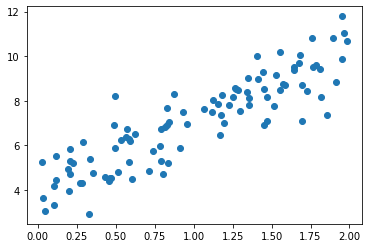

In [22]:
# 선형회귀는 하나 이상의 특성과 ㅇㄴ속적인 타깃 변수 사이의 계를 모델링하는것.
# 연속적인 출력값 예측
# y= W0 + W1*X (1차 선형회귀)
# 선형회귀의 목적: 특성과 타깃 사이의 관계를 나타내는 선형 방정식의 가중치(W1)를 학습하는 것.
# 블로그에 이론 내용 적혀있다.

# W0와 W1을 얻는 것을 훈련이라고 함.
# 모델이 훈련 데이터에 잘 맛도록 파라미터를 설정하고, 모델이 훈련 데이터에 얼마나 잘 맞는지 측정해야함.
# 비용함수
# MSE(mean squared error)_ 제곱을 해주기때문에 이상치에 민감_회귀모형의 비용함수로 많이 사용.
# MAE(mean absolute error)
# RMSE(root mean squared error)_참값과 비슷한 값으로 변환하기 때문에 해석이 쉬워짐

# 선형회귀 모델의 최적화 방법
# 1. 정규방정식
import matplotlib.pyplot as plt
import numpy as np

x= 2 * np.random.rand(100,1) # 0 ~ 1 사이의 균일분포 100,1 shape
y= 4 + 3*x + np.random.randn(100,1) # randn은 normal 분포에서 mu=0, var=1, shape=100,1. noise줬다고 생각하면 됨.
plt.scatter(x,y)
plt.show()

In [23]:
x_b=np.c_[np.ones((100,1)),x] # np.c_는 새로운 coloumn을 추가한다는 것, np.ones는 1을 생성하는건데 100,1로 생성하는 것.

theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y) # linear algebra를 inverse... 블로그에 있는 theta식 구현.
theta_best

array([[4.00028547],
       [3.09168373]])

In [24]:
# 기존 예측함수와 예측값이 다른 이유. noise term을 추가했기 때문에..

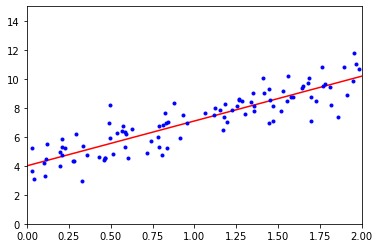

In [25]:
x_new=np.array([[0],[2]])
x_new_b=np.c_[np.ones((2,1)),x_new] # bias term 추가하는 이유. 추가하지않으면 W0를 학습시킬 수 없어서.

prediction=x_new_b.dot((theta_best))
prediction

plt.plot(x_new,prediction,"r-") # 두 점을 연결하는 선형 그래프
plt.plot(x,y,'b.')
plt.axis([0,2,0,15]) # 축 범위
plt.show()

In [26]:
# 내장 라이브러리 사용해서 간결하게 구하기
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y) # 학습용 데이터 넣고
print(lin_reg.intercept_,lin_reg.coef_)

[4.00028547] [[3.09168373]]


In [27]:
# 경사하강법
# 여러 종류의 문제에서 최적의 방법을 찾을수 있는 일반적인 최적화 알고리즘
# 1. 무작위로 벡터 세타를 초기화한다.
# 2. 세타에 대해 비용함수의 현재 그래디언트(기울기)를 계산한다.
# 3. 그래디언트가 감소하는 방향으로 진행하면서 그래디언트가 0이 되도록 한다.
# learning rate를 잘 결정해야 global minimum을 찾을 수 있다.( 학습률이 너무 작아도_local minimum에 빠짐, 너무 커도 안된다_수렴 안됨.)

# 무조건 특성 스케일을 해주어야 한다.(standardscaler 사용)

In [28]:
# 1. 배치 경사 하강법
# 경사 하강 스텝에서 전체 훈련 세트에 대해서 계산
# 큰 훈련 세트에서는 아주 느리다.
# 특성수에 민감하지 않고 정규방정식보다 빠르다는 장점이 있다.

import numpy as np

x= 2 * np.random.rand(100,1)
x_b = np.c_[np.ones((100,1)),x]
y= 4 + 3 * np.random.randn(100,1)

learning_rate=0.001
iterations = 1000
m=x_b.shape[0]

theta = np.random.randn(2,1)

for iteration in range(iterations):
  gradients = 2/m * x_b.T.dot(x_b.dot(theta)-y)
  theta = theta - (learning_rate * gradients)

theta

array([[2.43937951],
       [1.25472991]])

In [29]:
# 확률적 경사하강법
# 매 스텝마다 한 개의 샘플을 무작위로 선택해서 그 샘플에 대한 그래디언트를 계산한다.
# 최적화 속도가 빠르며 매우 큰 훈련 데이터를 처리할 수 있다.
# 학습률을 점진적으로 감소시키는 해결책이 있다.

# 블로그 보기

# 미니배치경사법
# 임의의 작은 샘플 세트에 대해 그래디언트를 계산한다.

# lasso는 쓸모없는 변수라고 생각하면 변수의 weight 값을 0으로 만듦. 차원 축소효과 있다.
# ridge는 0에 가깝게 만든다. 변수가 사라지지는 않는다. lasso보다 ridge를 많이 쓴다.


# Early Stopping 아주 중요
# 검증 에러가 훈련 에러에 비해 치솟게 되면 바로 훈련을 중지시킨다.